In [1]:
# Incident Reports inital exploration
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_incidents = pd.read_excel("../data/Incidents (1-1-14 - 8-31-18).xlsx")
print(len(df_incidents))
df_incidents.head()

25826


,date,incident_number,incident_type,incident_call_type,cas_event_number,status,address,city,state,zip,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2014-01-01,14-0533,fire,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,...,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,2014-01-01,14-0534,police,hot,NaN,closed,604 SIBLEY AVE.,CALUMET CITY,IL,60409.0,...,0.0,1.0,0.0,1.0,NaN,2014-01-01 14:25:00,2014-01-01 14:30:00,2014-01-01 15:20:00,2014-01-01 16:00:00,2014-01-01 16:00:00
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [3]:
# Remove blank rows and only capture data on fires
df_incidents.dropna(how='all',inplace=True)
df_incidents.head()

,date,incident_number,incident_type,incident_call_type,cas_event_number,status,address,city,state,zip,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
1,2014-01-01,14-0533,fire,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,...,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
3,2014-01-01,14-0534,police,hot,NaN,closed,604 SIBLEY AVE.,CALUMET CITY,IL,60409.0,...,0.0,1.0,0.0,1.0,NaN,2014-01-01 14:25:00,2014-01-01 14:30:00,2014-01-01 15:20:00,2014-01-01 16:00:00,2014-01-01 16:00:00
5,2014-01-01,14-0535,fire,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,...,0.0,4.0,0.0,1.0,NaN,2014-01-01 16:05:00,2014-01-01 16:20:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00
7,2014-01-01,14-0536,fire,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,...,0.0,2.0,0.0,1.0,NaN,2014-01-01 21:10:00,2014-01-01 21:15:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00
9,2014-01-02,14-0537,fire,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,...,0.0,0.0,0.0,0.0,NaN,2014-01-02 07:40:00,2014-01-02 07:45:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00


In [4]:
# Filter to only fires
df_incidents = df_incidents[df_incidents['incident_type']=='fire']
df_incidents.drop('incident_type',axis=1,inplace=True)
print(list(df_incidents.columns))
df_incidents.head()

['date', 'incident_number', 'incident_call_type', 'cas_event_number', 'status', 'address', 'city', 'state', 'zip', 'county', 'lat', 'lng', 'narrative', 'units_destroyed', 'units_major', 'units_minor', 'units_affected', 'num_people_injured', 'num_people_hospitalized', 'num_people_deceased', 'num_adults', 'num_children', 'num_families', 'assistance_given', 'incident_verified', 'dispatch_relayed', 'responders_identified', 'dat_on_scene', 'dat_departed_scene']


,date,incident_number,incident_call_type,cas_event_number,status,address,city,state,zip,county,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
1,2014-01-01,14-0533,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,Cook,...,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
5,2014-01-01,14-0535,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,Cook,...,0.0,4.0,0.0,1.0,NaN,2014-01-01 16:05:00,2014-01-01 16:20:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00
7,2014-01-01,14-0536,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,Cook,...,0.0,2.0,0.0,1.0,NaN,2014-01-01 21:10:00,2014-01-01 21:15:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00
9,2014-01-02,14-0537,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,Lake,...,0.0,0.0,0.0,0.0,NaN,2014-01-02 07:40:00,2014-01-02 07:45:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00
11,2014-01-02,14-0538,NaN,1-1F76M7,closed,4002 S BRIGHTON PL,CHICAGO,IL,60632.0,Cook,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [5]:
# Fill NaN Values
numeric_cats = ['units_destroyed','units_major', 'units_minor', 'units_affected',
              'num_people_injured', 'num_people_hospitalized', 'num_people_deceased',
              'num_adults', 'num_children', 'num_families','assistance_given']
for cat in numeric_cats:
    df_incidents[cat].fillna(0,inplace=True)
# Convert to DateTime
for cat in ['date','incident_verified', 'dispatch_relayed',
            'responders_identified', 'dat_on_scene', 'dat_departed_scene']:
    df_incidents[cat] = pd.to_datetime(df_incidents[cat],errors='coerce')
df_incidents.head()

,date,incident_number,incident_call_type,cas_event_number,status,address,city,state,zip,county,...,num_people_deceased,num_adults,num_children,num_families,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene
1,2014-01-01,14-0533,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,Cook,...,0.0,10.0,8.0,5.0,0.0,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
5,2014-01-01,14-0535,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,Cook,...,0.0,4.0,0.0,1.0,0.0,2014-01-01 16:05:00,2014-01-01 16:20:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00
7,2014-01-01,14-0536,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,Cook,...,0.0,2.0,0.0,1.0,0.0,2014-01-01 21:10:00,2014-01-01 21:15:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00
9,2014-01-02,14-0537,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,Lake,...,0.0,0.0,0.0,0.0,0.0,2014-01-02 07:40:00,2014-01-02 07:45:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00
11,2014-01-02,14-0538,NaN,1-1F76M7,closed,4002 S BRIGHTON PL,CHICAGO,IL,60632.0,Cook,...,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT,NaT


In [6]:
# Interesting Statistics 
from collections import OrderedDict
from numpy import nansum,nanmin,nanmax,nanmean,nanmean,nanstd,abs
stat_fs = OrderedDict({
    'total': lambda x: nansum(x),
    'min_f': lambda x: nanmin(x),
    'max_f': lambda x: nanmax(x),
    'mean_f': lambda x: nanmean(x),
    'std_f': lambda x: nanstd(x),
    'zStat_f': lambda x: (x-nanmean(x))/nanstd(x),
    'uStat_f': lambda x: x/(nanmax(x)-nanmin(x))})
def gen_stat_df(df,categories,stats):
    new_df = {'category':categories}
    for stat in stats:
        new_df[stat] = [stat_fs[stat](df[cat].values) for cat in categories]
    return pd.DataFrame(new_df)
stat_df = gen_stat_df(df=df_incidents,categories=numeric_cats,stats=list(stat_fs.keys())[:-2])
stat_df

,category,total,min_f,max_f,mean_f,std_f
0,units_destroyed,1460.0,0.0,71.0,0.256997,1.414138
1,units_major,4927.0,0.0,40.0,0.867277,1.649862
2,units_minor,2522.0,0.0,49.0,0.443936,1.306046
3,units_affected,2162.0,0.0,88.0,0.380567,2.266958
4,num_people_injured,508.0,0.0,15.0,0.089421,0.485410
5,num_people_hospitalized,720.0,0.0,11.0,0.126738,0.505688
6,num_people_deceased,192.0,0.0,10.0,0.033797,0.269140
7,num_adults,18999.0,0.0,121.0,3.344306,4.307706
8,num_children,9592.0,0.0,55.0,1.688435,2.654304
9,num_families,9311.0,0.0,57.0,1.638972,2.519438


In [7]:
# Extract Features
timeDelta_f = lambda df,t1s,t2s: df[t2s].subtract(df[t1s])
df_incidents['verify_to_relay'] = timeDelta_f(df_incidents,'incident_verified','dispatch_relayed')
df_incidents['relay_to_responderID'] = timeDelta_f(df_incidents,'dispatch_relayed','responders_identified')
df_incidents['respondID_to_onScene'] = timeDelta_f(df_incidents,'responders_identified','dat_on_scene')
df_incidents['onScene_to_leaveScene'] = timeDelta_f(df_incidents,'dat_on_scene','dat_departed_scene')
# Example of bad data
#    Still need to clean timeDeltas so that bad data doesn't mess up average/std/...
print(df_incidents.loc[5]['respondID_to_onScene'].components)
df_incidents.head()

Components(days=-364, hours=21, minutes=17, seconds=0, milliseconds=0, microseconds=0, nanoseconds=0)


,date,incident_number,incident_call_type,cas_event_number,status,address,city,state,zip,county,...,assistance_given,incident_verified,dispatch_relayed,responders_identified,dat_on_scene,dat_departed_scene,verify_to_relay,relay_to_responderID,respondID_to_onScene,onScene_to_leaveScene
1,2014-01-01,14-0533,hot,1-1F69GF,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,Cook,...,0.0,2014-01-01 07:00:00,2014-01-01 08:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00,01:00:00,0 days 00:08:00,0 days 01:00:00,16:37:00
5,2014-01-01,14-0535,hot,1-1F6ATB,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,Cook,...,0.0,2014-01-01 16:05:00,2014-01-01 16:20:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00,00:15:00,363 days 03:53:00,-364 days +21:17:00,00:40:00
7,2014-01-01,14-0536,hot,1-1F6ATV,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,Cook,...,0.0,2014-01-01 21:10:00,2014-01-01 21:15:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00,00:05:00,0 days 00:35:00,0 days 01:09:00,00:52:00
9,2014-01-02,14-0537,hot,1-1F6AT5,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,Lake,...,0.0,2014-01-02 07:40:00,2014-01-02 07:45:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00,00:05:00,0 days 00:25:00,0 days 01:30:00,12:35:00
11,2014-01-02,14-0538,NaN,1-1F76M7,closed,4002 S BRIGHTON PL,CHICAGO,IL,60632.0,Cook,...,0.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


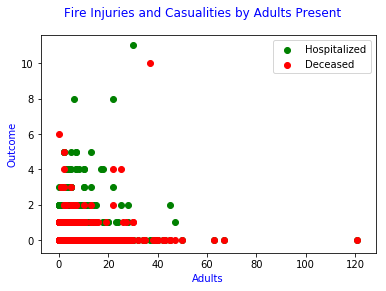

In [8]:
# Scatter Plot
def gen_figure(pltType,title,xlabel,ylabel,data_x,data_y,output):
    if pltType == 'scatter':
        fig, ax = plt.subplots()
        fig.suptitle(title,color='blue')
        ax.set_xlabel(xlabel,color='blue')
        ax.set_ylabel(ylabel,color='blue')
        for name,(trend,color) in data_y.items():
            plt.scatter(data_x,trend,color=color,label=name)
        plt.legend()
        if output: plt.savefig('../output/Figures/%s.png'%(title),dpi=150)  

gen_figure(
        pltType = 'scatter',
        title = 'Fire Injuries and Casualities by Adults Present',
        xlabel = 'Adults',
        ylabel = 'Outcome',
        data_x = df_incidents['num_adults'].values,
        data_y = {'Hospitalized':(df_incidents['num_people_hospitalized'].values,'green'),
                'Deceased':(df_incidents['num_people_deceased'].values,'red')},
        output = True)